<a href="https://colab.research.google.com/github/itsmimahi/ML-Classification-Project/blob/main/ML_Classificatin_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Probleme statement`
Problem Statement:
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Data Description -


*   Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
*Four_g - Has 4G or not
*Int_memory - Internal Memory in Gigabytes
*M_dep - Mobile Depth in cm
*Mobile_wt - Weight of mobile phone
*N_cores - Number of cores of processor
*Pc - Primary Camera mega pixels
*Px_height - Pixel Resolution Height
*Px_width - Pixel Resolution Width
*Ram - Random Access Memory in Mega Bytes
*Sc_h - Screen Height of mobile in cm
*Sc_w - Screen Width of mobile in cm
*Talk_time - longest time that a single battery charge will last when you are
*Three_g - Has 3G or not
*Touch_screen - Has touch screen or not
*Wifi - Has wifi or not
*Price_range - This is the target variable with value of
* 0(low cost)

* 1(medium cost)

* 2(high cost)

* 3(very high cost)

Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

   




In [92]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# setting max display column limit to 30
pd.set_option('display.max_columns', 30)

In [93]:
# Mounting drive
from google.colab import drive

In [94]:
# File path
file_path = "/content/drive/MyDrive/ML Classification project/data_mobile_price_range.csv"

In [95]:
# Importing csv file in our dataframe
mobile_data = pd.read_csv(file_path)

In [96]:
# Getting number of rows and number of column of our dataset.
mobile_data.shape

(2000, 21)

In [97]:
# Overview of our dataset.
mobile_data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [98]:
mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [99]:
# Getting information about dataset.
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [100]:
# Checking statistical information of our dataset.
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


* We can see that sc_w and px_height column has minimum value is 0 which is not possible, so we have to do something with it.

In [101]:
# Checking how many observations of screen width column value has 0.
print(mobile_data[mobile_data['sc_w']==0].shape[0])

180


In [102]:
# Checking how many observation having px_height value as 0.
print(mobile_data[mobile_data['px_height']==0].shape[0])

2


In [103]:
# As there are only 2 observation in which px_height = 0, so we will drop it.
mobile_data = mobile_data[mobile_data['px_height']!= 0]

# Nearest neighbor imputation (KNN imputer)
Missing values are imputed by using K-Nearest Neighbor approach where euclidean distance is use to find the nearest neighbor

Before using K-nearest neighbor we need to replace 0 with NaN values, only after that it will work.


In [104]:
# Replacing 0 with NaN, so we can use KNN imputer.
mobile_data['sc_w'] = mobile_data['sc_w'].replace(0,np.nan)

In [105]:
# Import KNN imputer from sklearn.
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data = pd.DataFrame(impute_knn.fit_transform(mobile_data), columns=mobile_data.columns)

In [106]:
# Checking shape
mobile_data.shape

(1998, 21)

In [107]:
# Checking how many observation value of sc_w as 0.
print(mobile_data[mobile_data['sc_w']==0].shape[0]) 

0


**we have handled the mismatch values**

In [108]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

* We dont have any object data type in our dataset
* We dont have any null values in our dataset
* price_range is our target varaible

In [109]:
# Checking null values.
mobile_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'Visualising Null values')

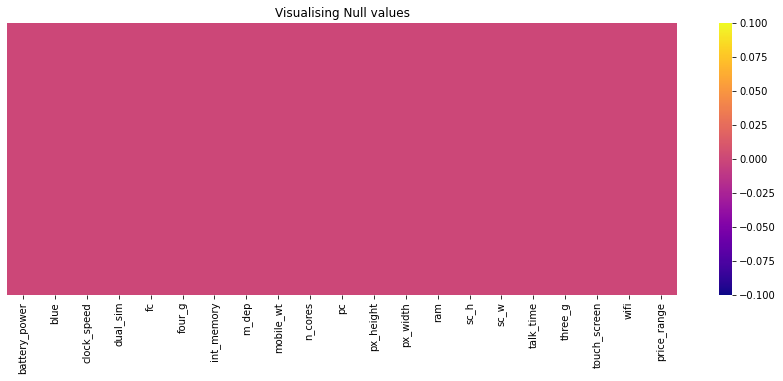

In [110]:
# Visualising null values on heatmap.
plt.figure(figsize = (15,5))
sns.heatmap(mobile_data.isnull(), cmap='plasma', annot = False, yticklabels = False)
plt.title('Visualising Null values')

In [111]:
# Checking duplicate values in dataset.
print(f'we have {mobile_data.duplicated().sum()} duplicate values in our dataset ')

we have 0 duplicate values in our dataset 


# **`EXPLORATORY DATA ANALYSIS (EDA)`**

In [112]:
# Lets have a look at our target variable.
price_range_values = mobile_data['price_range'].value_counts()

**As we can see that counts of target variable is equally distributed in all categories, thus we dont have imblance target variable which is good for us.**

**Accuracy score will be the best evaluation metric for us to selet the model.**

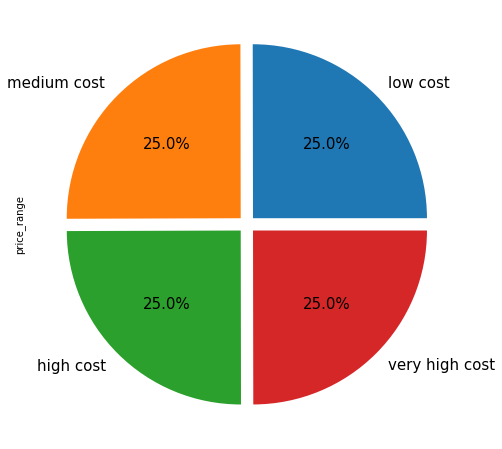

In [113]:
# Visualising the target variable class distribuation.
labels = ['low cost','medium cost','high cost','very high cost']
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart



# Corelation of dependant variable with other independant varaible.

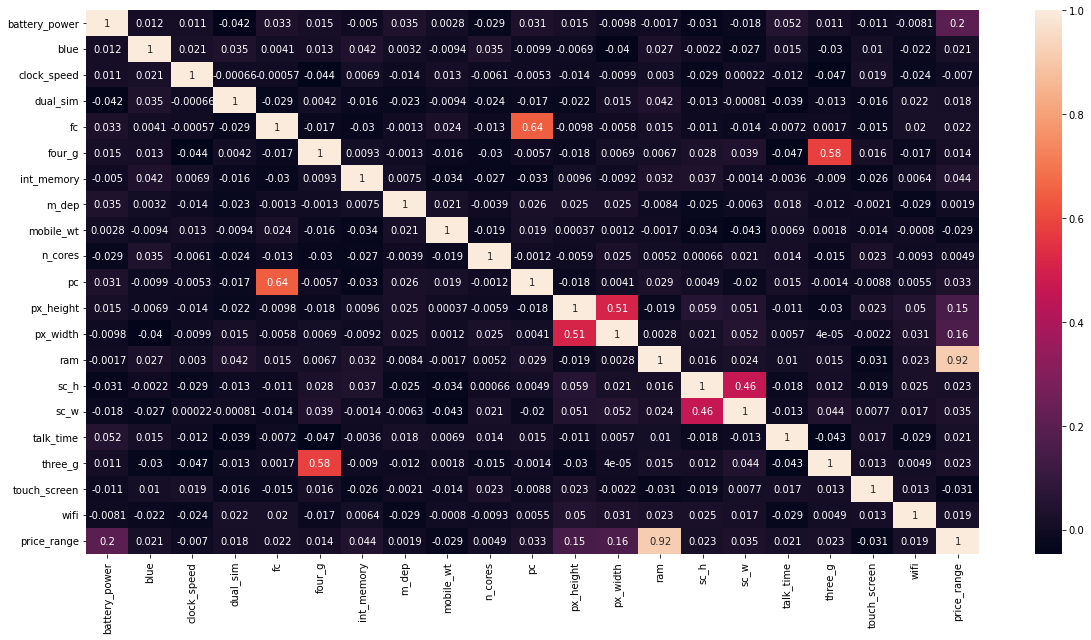

In [114]:
corr = mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

Observations:
* RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.
* Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.
* Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

* Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* primary camera i.e pc and front camera fc are positively correlated.

* sc_h and sc_w are positively correlated

# **Univaraite analysis of categorical column**

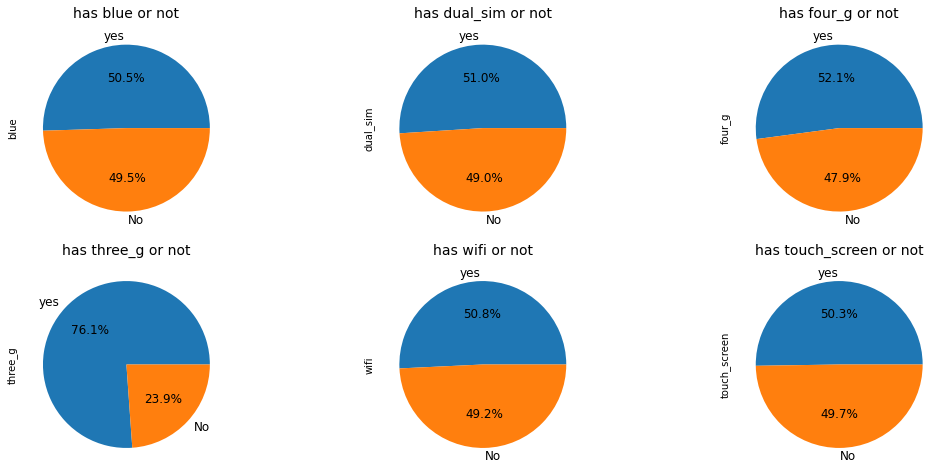

In [115]:
# Plotting the pie chart for binary categorical column.
plt.figure(figsize=(15,10))

rows = 3
col = 3
count = 1
var_list = ['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels = ['yes','No']

for var in var_list:
  plt.subplot(rows,col,count)
  mobile_data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize = 12, labels = labels,)
  plt.title(f'has {var} or not',fontsize = 14)
  plt.tight_layout()
  count = count+1

* 1 means it has the specification
* 0 it does not have the specification
* percentage distribution of mobiles having bluetooth,4G,dual sim,wifi,touch screen are almost 50%.
* very few mobile(23.9%) mobile dont have 3G service.

# **Relation between RAM, Battary_power, px_height, px_width.**

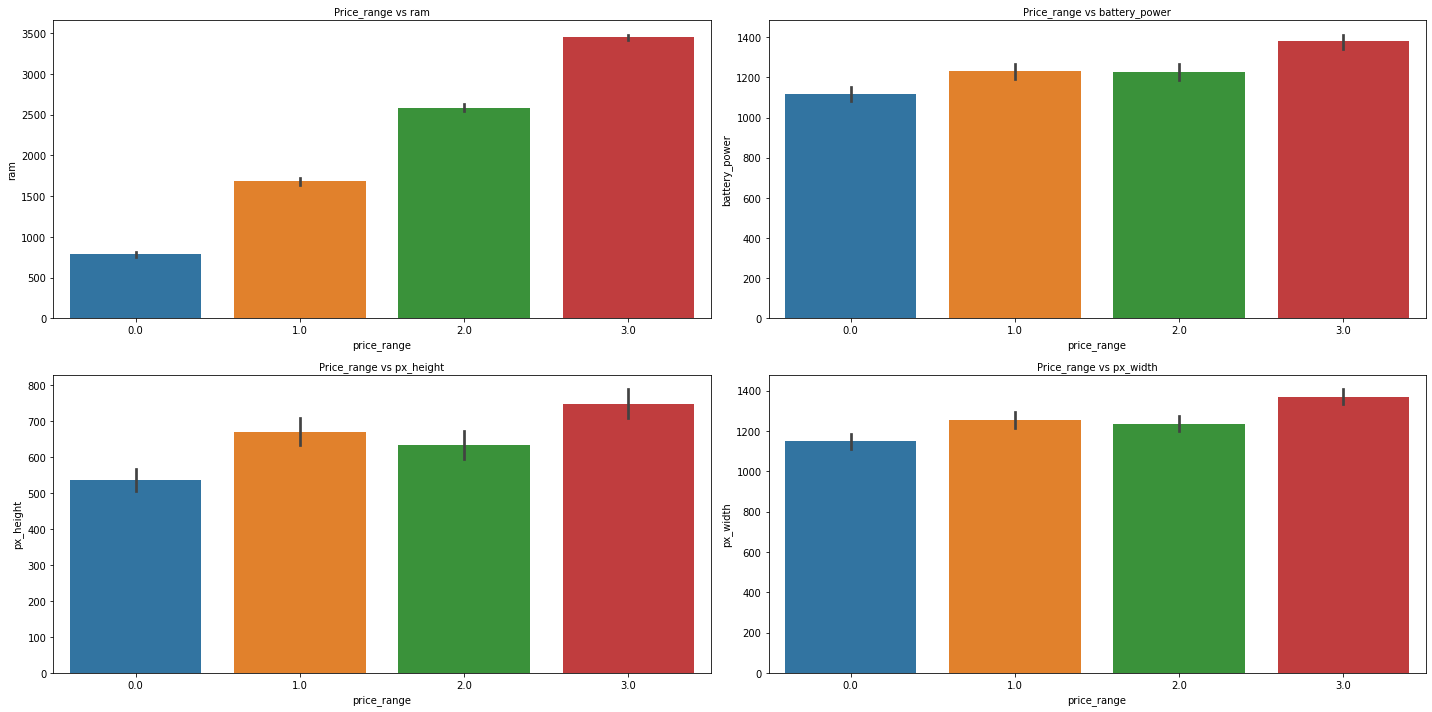

In [116]:
# Plotting price_range vs other feature.

plt.figure(figsize=(20,10))
labels = ['0 = low_cost','1 = medium_cost','2 = high_cost','3 = very_high_cost']

rows = 2
col = 2
count = 1

variables = ['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,col,count)
  sns.barplot(x = mobile_data['price_range'], y= mobile_data[var])
  plt.title(f'Price_range vs {var}', fontsize = 10)
  count = count+1
  plt.tight_layout()

# **Observation:**
* Mobiles having ram more than 3000 mb falls under very high category, as ram increases price range also increases.
* Mobiles having ram under 1000mb falls under low cost category.
* Mobiles having battary power more than 1300 mAh falls under very high cost, and mobiles with battary power between 1200-1300 are also comes under medium cost and somes are high cost either.
* Mobiles with more than 700 px_height and px_width 1300 are comes under high cost catogory.

In [117]:
# Checking the counts of binary categorical variable by grouping price range.
group_by_price = mobile_data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','wifi':'value_counts','touch_screen':'value_counts'}).unstack()

In [118]:
# # Visualising by barplot chart
# group_by_price.plot.bar(figsize=(25,15))
# plt.title('count of mobile in each price range with supported or not supported mobile specification')
# plt.x_lable('price_range')
# plt.y_lable('count of mobile')
# plt.legend(loc='upper center')

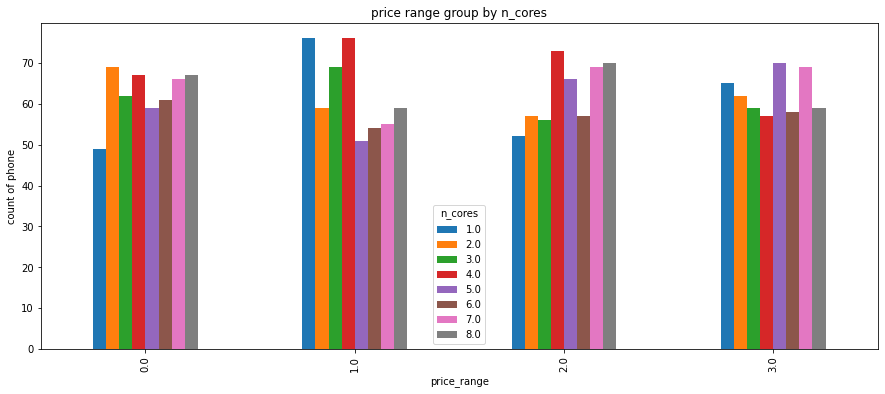

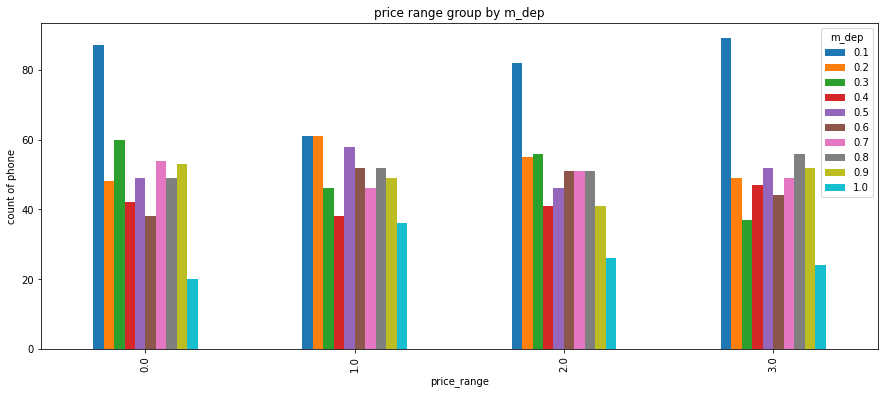

In [119]:
list_2 = ['n_cores','m_dep']
for item in list_2:
  mobile_data.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6))
  plt.title(f'price range group by {item}')
  plt.ylabel('count of phone')

# **Obsevation:**
* There are very few mobile in price range 0 and 1 with lesser no of cores.
* most of the mobile in price range 2 and 3 are with high no of cores.
* number of phone with less thickness is high and count of phones with high thickness is low.

# **Lets check the which numerical feature driving the price range most.**

In [120]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

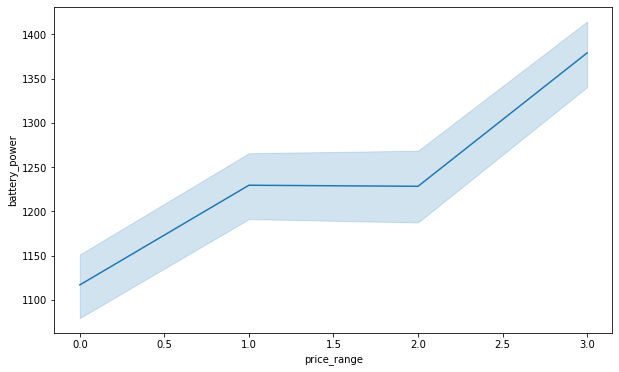

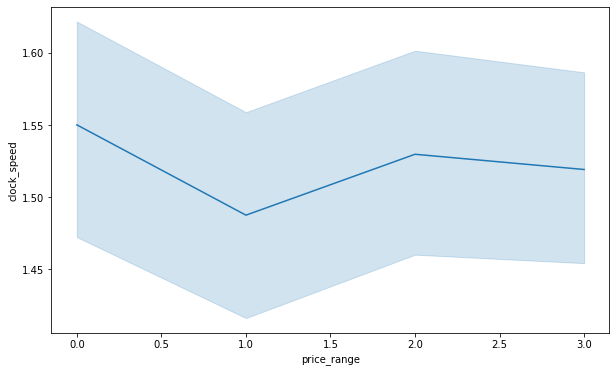

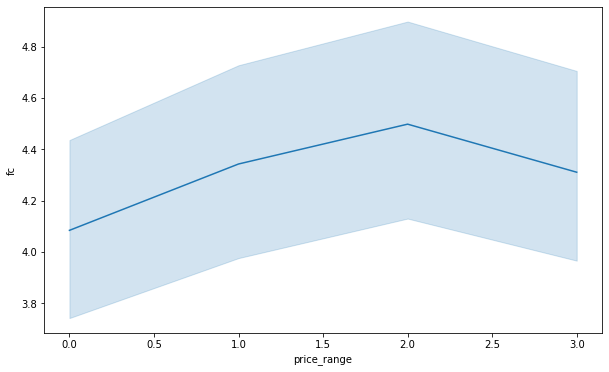

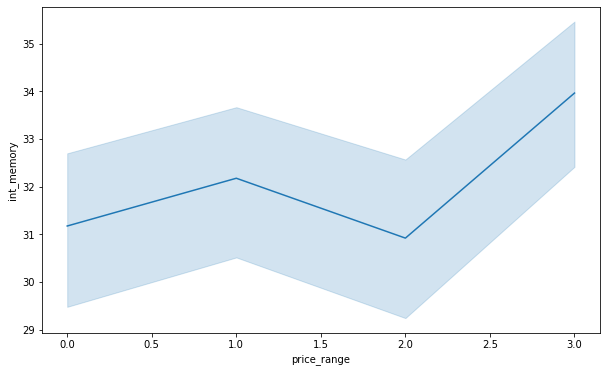

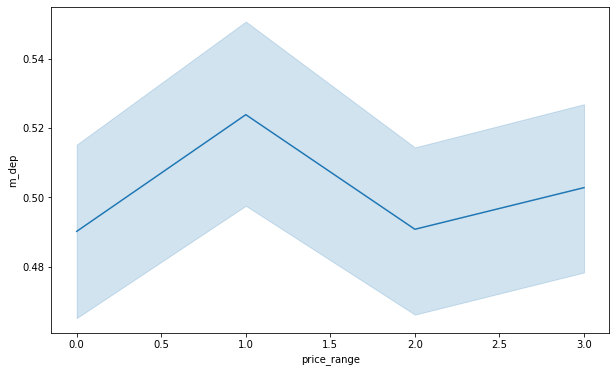

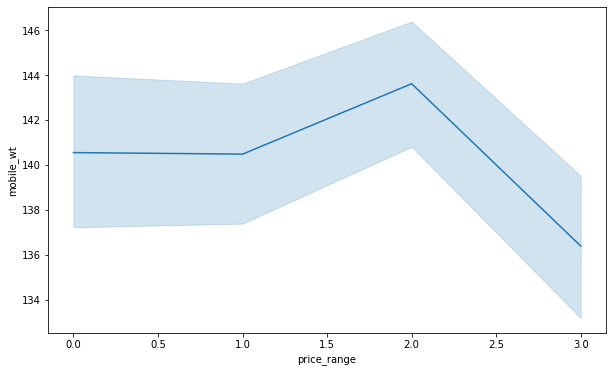

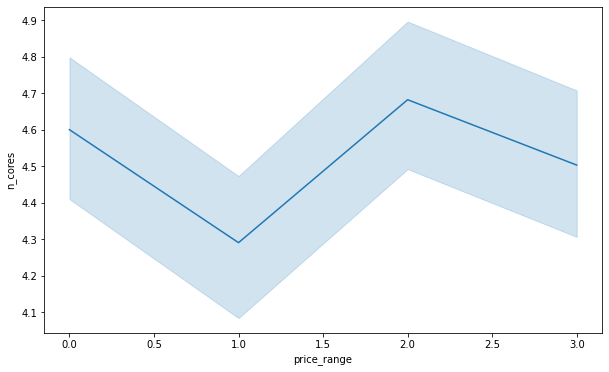

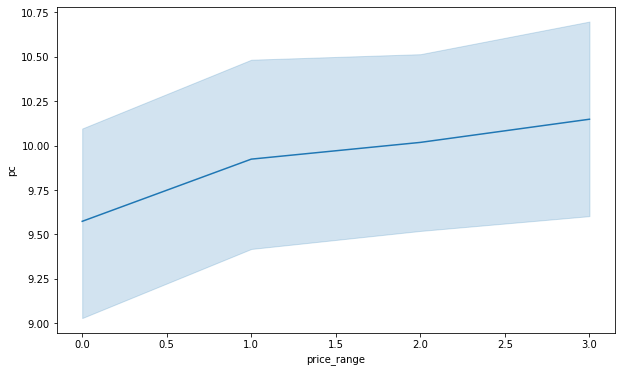

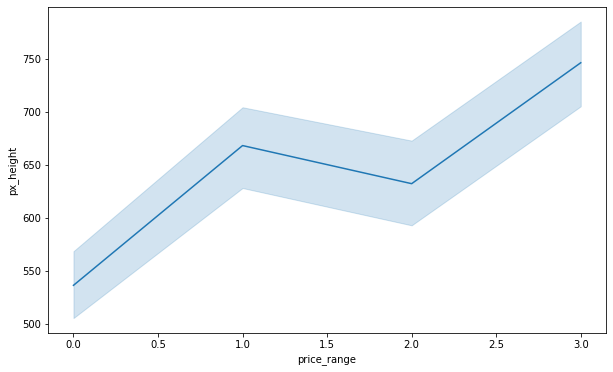

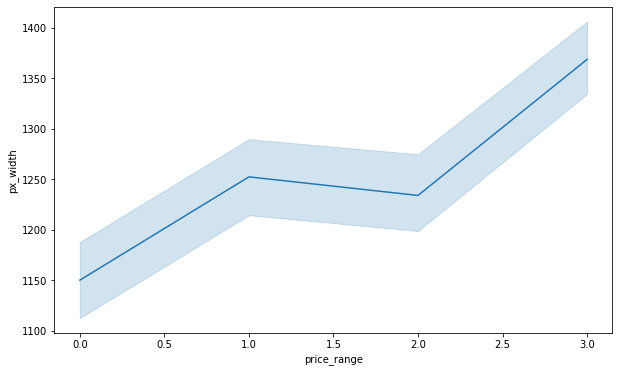

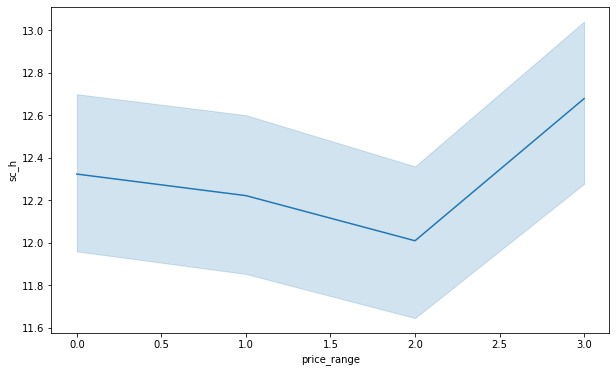

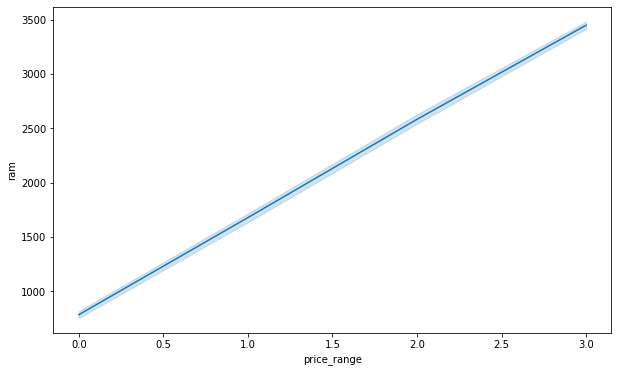

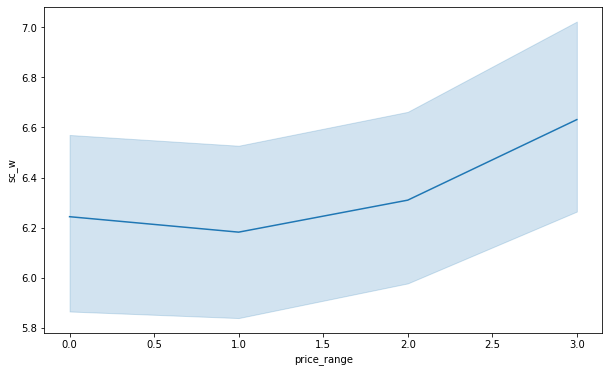

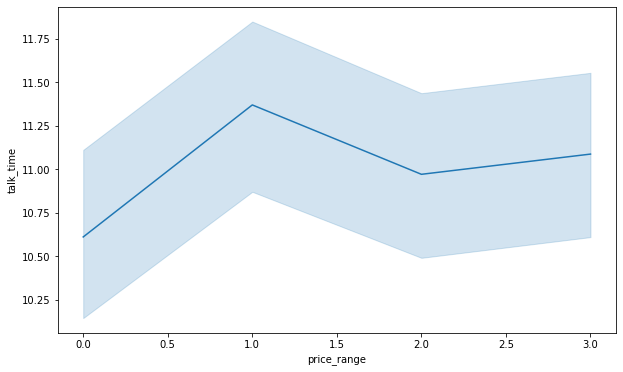

In [121]:
list_1 = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting box plot and distribution.
count = 5
for var in list_1:
  plt.figure(figsize=(10,6))
  sns.lineplot(x=mobile_data['price_range'],y=mobile_data[var])

# **Observation:**
* For class 1 and class 2 battery power range is almost similar as battery power increases price willl also increase which is quiet obvious.
* Mobile in very high price ranges in class 3 has less in weight as compared to other class mobile, which means as price goes high weight of mobile decrease subsequently.
* Mobile having max screen height and width falls in very high price category, we can see in linechart of sc_width and sc_height from class 2 screen width and height start increasing with price similar case is with px_height and px_width.as resolution of scren increases the price will aslo increase.
* RAM has clear relationship with price range we saw that in corelation matrix also.

# **Mobile with both 3G and 4G**

In [122]:
# Mobiles having both 3G and 4G specification.
three_g_and_four_g_df = mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']==1)]

In [123]:
three_g_and_four_g_df['price_range'].value_counts()

3.0    274
1.0    261
0.0    259
2.0    247
Name: price_range, dtype: int64

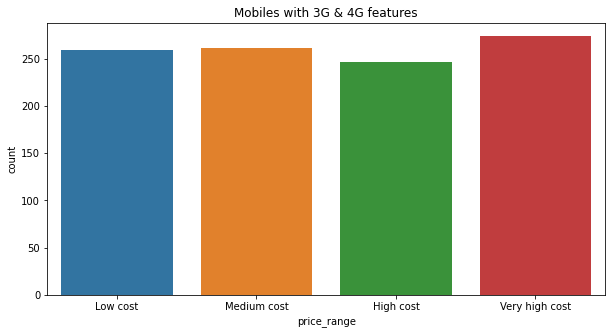

In [124]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_four_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','Medium cost','High cost','Very high cost'])
plt.title('Mobiles with 3G & 4G features')
plt.show()

**As we cam see that from low cost to very high cost mobiles have both features.**

# **Mobile with Bluetooth feature**

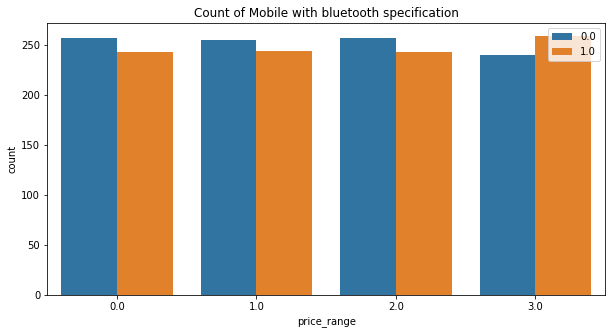

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['blue'])
plt.title('Count of Mobile with bluetooth specification')
plt.legend(loc='best')

Majority of phones have price range between 0 to 2 dont have bluetooth feature, on other hand phones having price range in 3 do have bluetooth feature.

# **Lets check the distribution of nemerical column with outlier.**

In [126]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [127]:
# Numeric col list.
numeric_col = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']


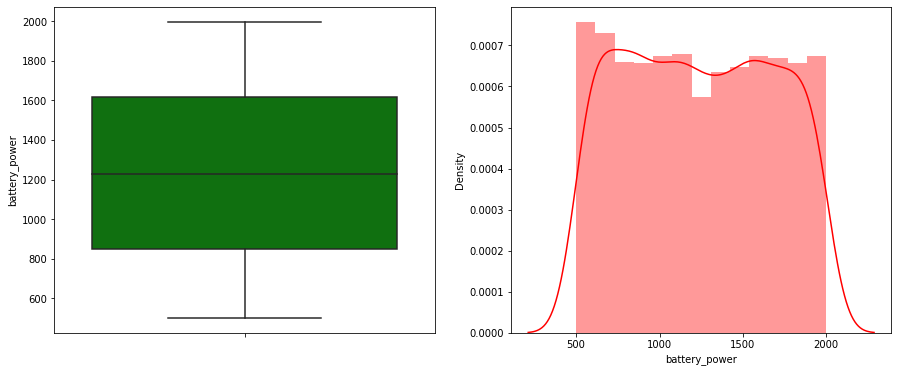

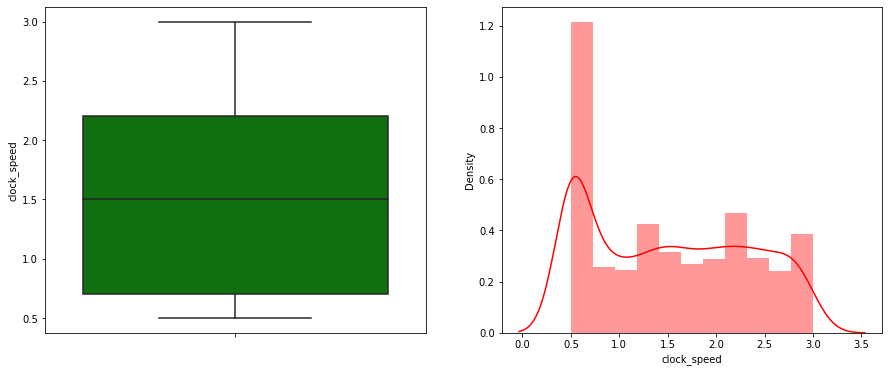

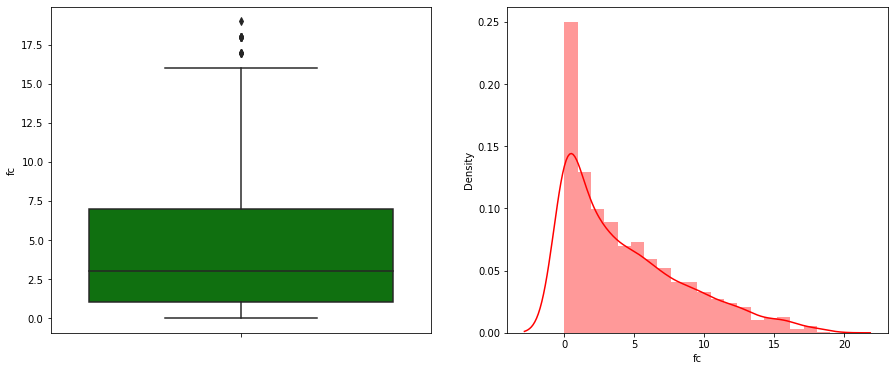

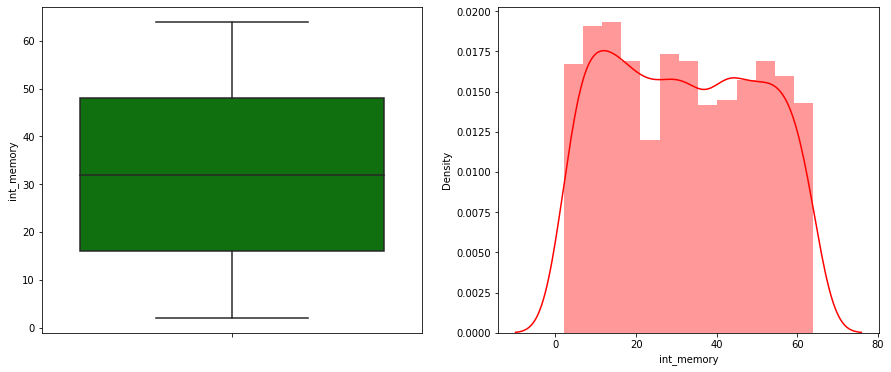

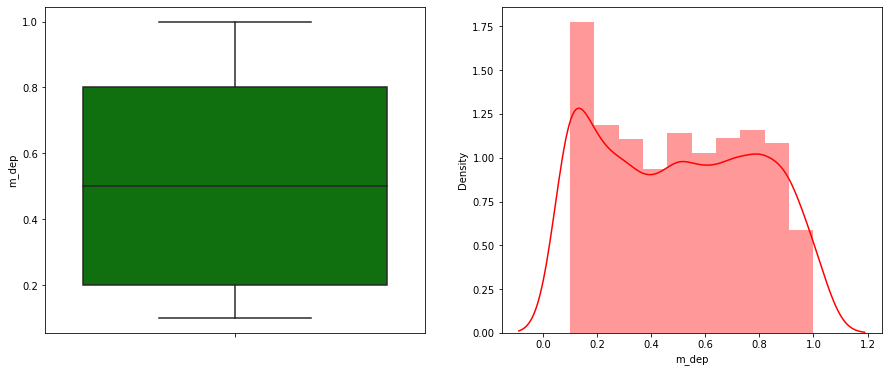

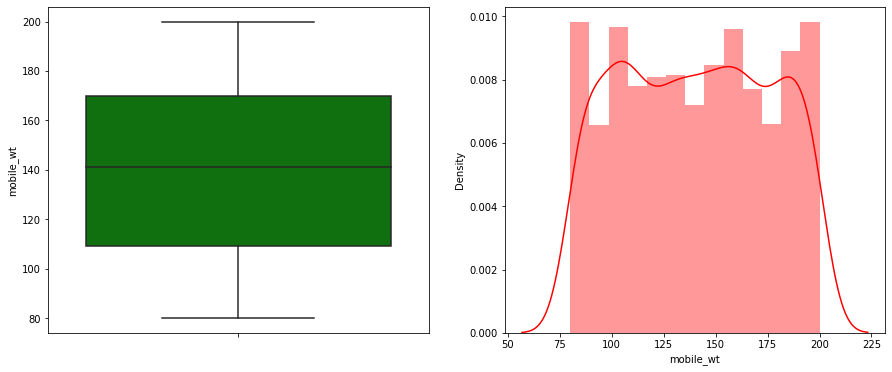

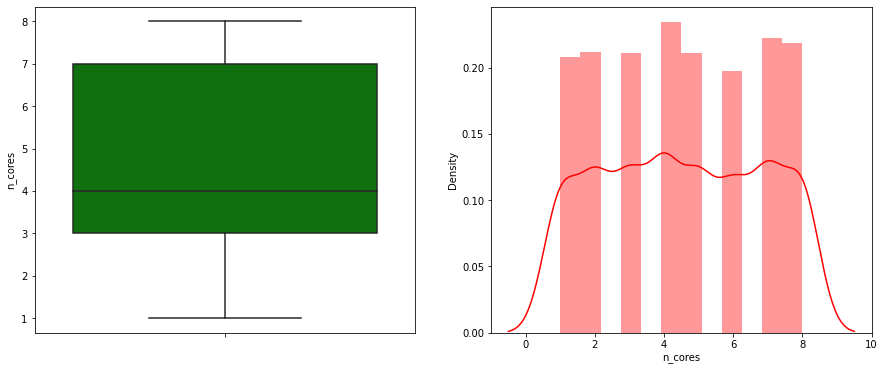

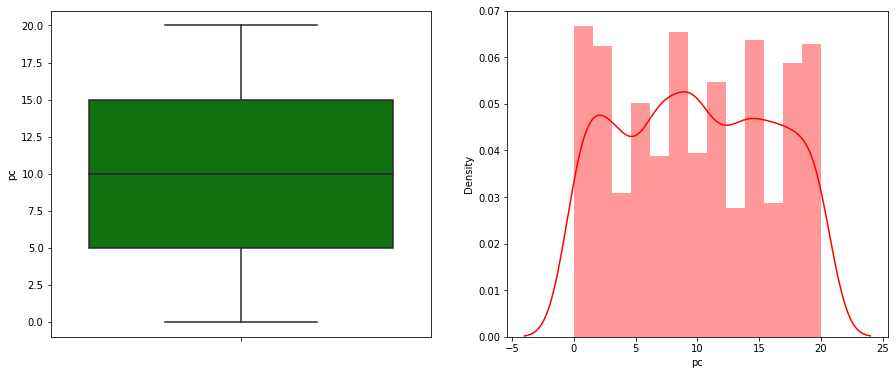

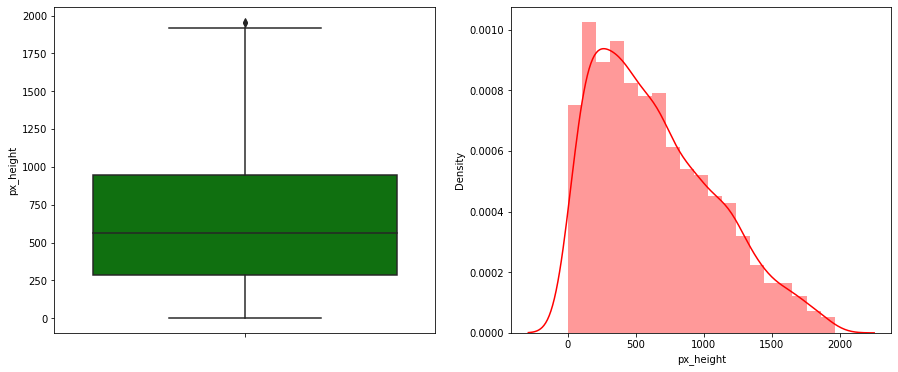

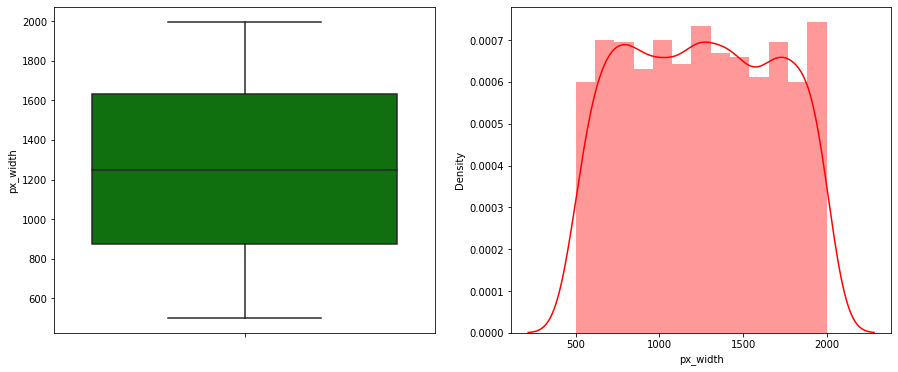

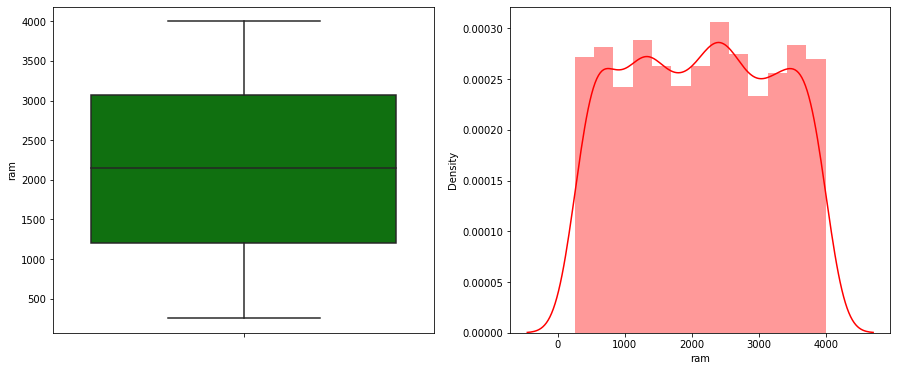

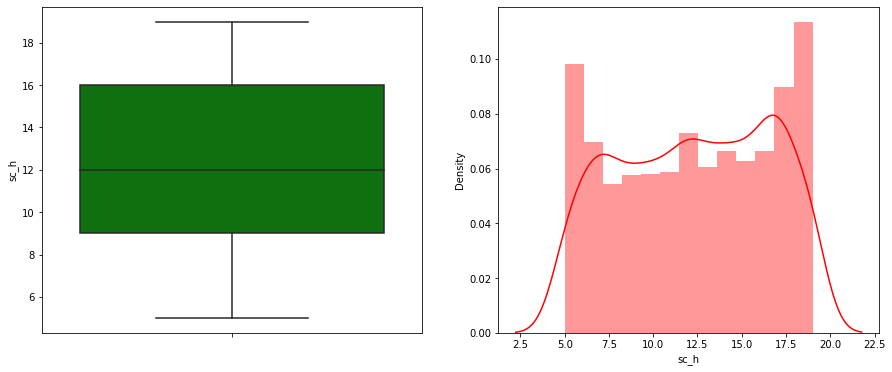

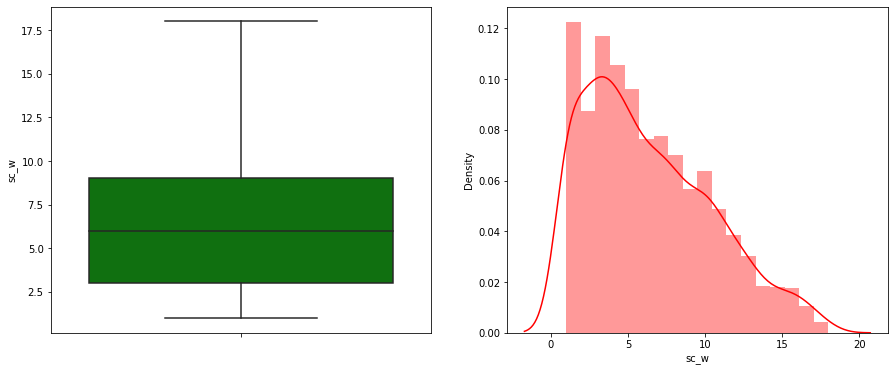

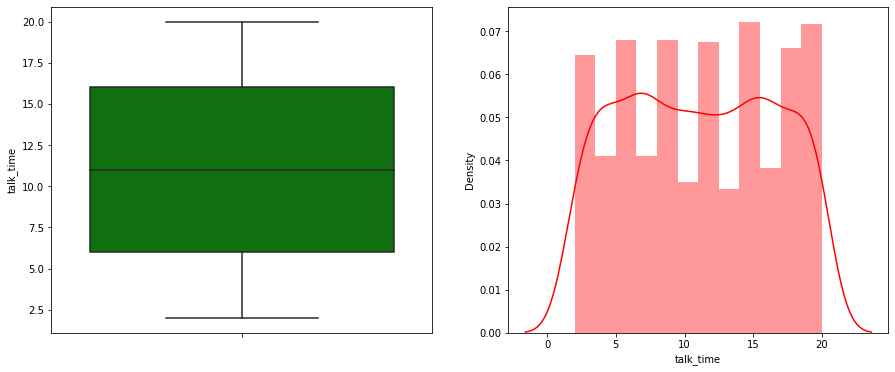

In [128]:
# plotting boxplot and distribution.
for var in numeric_col:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  fig = sns.boxplot(y=mobile_data[var],color='green')
  fig.set_ylabel(var)

  plt.subplot(1,2,2)
  fig = sns.distplot(mobile_data[var],color='red')
  fig.set_xlabel(var)

  plt.show()


* Data is well distributed.
* px_height and fc has some outlier.

# **Outlier treatment**

In [129]:
q1 = mobile_data['fc'].quantile(0.25)
q3 = mobile_data['fc'].quantile(0.99)
IQR = q3-q1

# Outlier are present after quantile 3, so we will take datapoints before q3.
mobile_data = mobile_data[(mobile_data['fc'] <= q3)]

In [130]:
Q1 = mobile_data['px_height'].quantile(0.25)
Q3 = mobile_data['px_height'].quantile(0.99)
IQR = Q3-Q1

# Outlier are present after quantile 3, so we will take datapoints before q3.
mobile_data = mobile_data[(mobile_data['px_height'] <= Q3)]

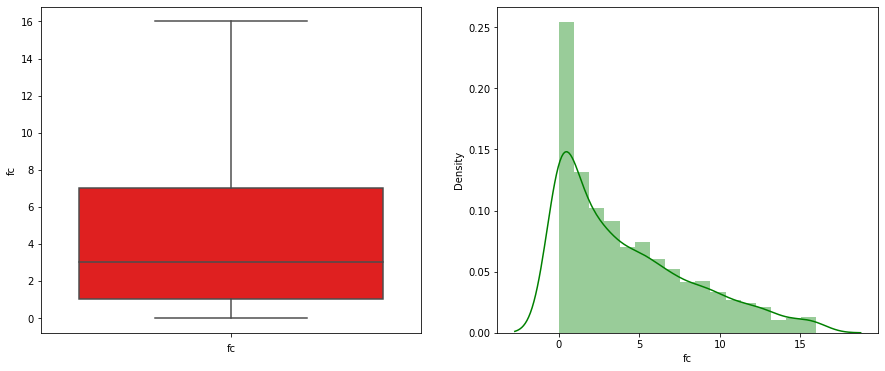

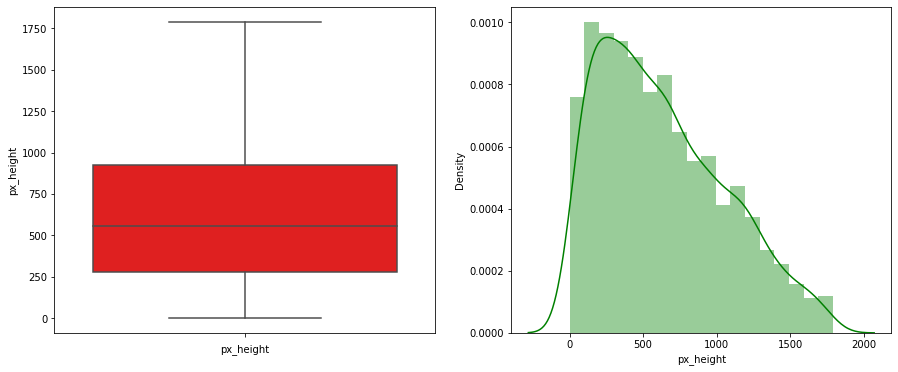

In [131]:
# Visualising weather outlier are removed or not.
for var in ['fc','px_height']:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  fig = sns.boxplot(y=mobile_data[var],color='red')
  fig.set_ylabel(var)

  plt.subplot(1,2,2)
  sns.distplot(mobile_data[var],color='green')

  fig.set_xlabel(var)
  plt.show()

* So as you can see outliers has been removed.

In [132]:
# Creating copy of mobile_data.
mobile_df = mobile_data.copy()

# **Feature selection**

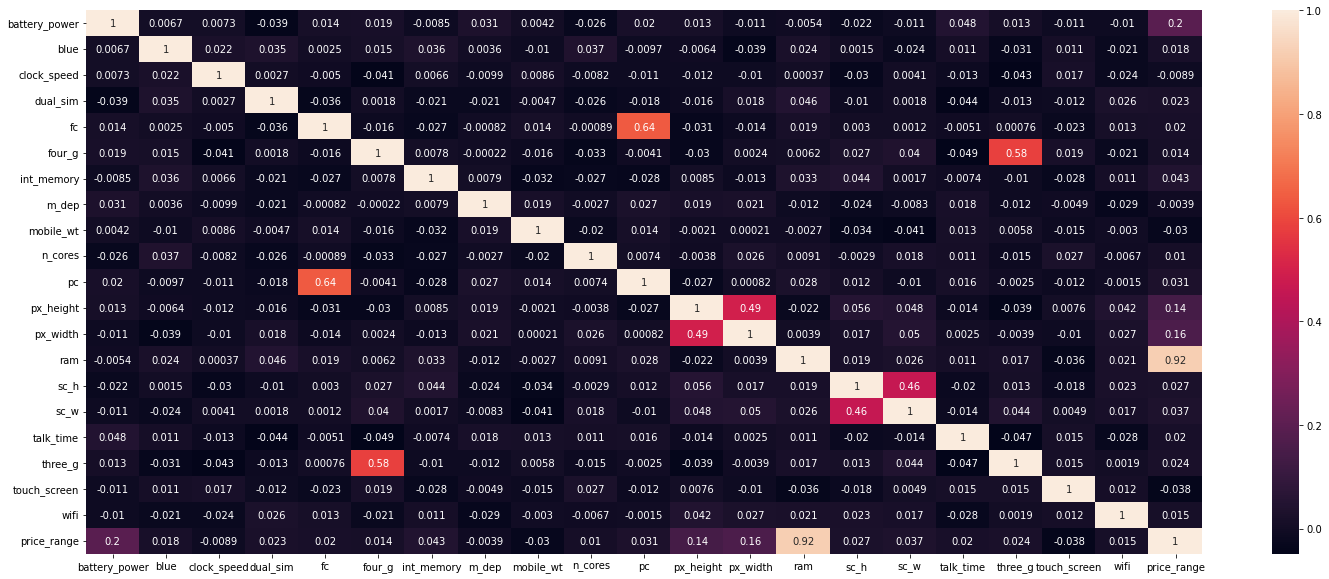

In [133]:
corr = mobile_data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)

In [134]:
# Separating x(independent variable) and y(dependent varaible).
x = mobile_data.drop('price_range',axis=1)
y = mobile_data['price_range']

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [136]:
# We are goint to select top 12 important feature.
bestfeature = SelectKBest(score_func=chi2,k=12)
fit = bestfeature.fit(x,y)

In [137]:
# creating scores and columns dataframe.
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(x.columns)

In [138]:
# concatinating two dataframe.
featurescore = pd.concat([scores_df,columns_df],axis = 1)
featurescore.columns = ['score','specs']

In [139]:
featurescore

,score,specs
0,13280.966163,battery_power
1,0.617492,blue
2,0.825187,clock_speed
3,0.736884,dual_sim
4,10.792275,fc
5,1.325825,four_g
6,78.335547,int_memory
7,0.753696,m_dep
8,86.994559,mobile_wt
9,8.258067,n_cores


In [140]:
# top 12 feature with chi squared statistics.
print(featurescore.nlargest(12,'score'))

            score          specs
13  914461.974710            ram
11   15547.096304      px_height
0    13280.966163  battery_power
12    9174.579174       px_width
8       86.994559      mobile_wt
6       78.335547     int_memory
14      11.811308           sc_h
16      11.772887      talk_time
15      11.206817           sc_w
4       10.792275             fc
9        8.258067        n_cores
10       7.633930             pc


In [141]:
# 12 Feature with high chi squared statistics are selected as our independent variable (x variable).
x = mobile_data[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# Dependant variable.
y = mobile_data['price_range']

# **`Predictive modelling`**

## **Algorithm which we are going to used for preicting model.**
 

1.   Random forest classifer.
2.   Decision tree.
3.   Gradient boosting classifier.
4.   K-nearest neighbor classifier.
5.   XG boost classifier
6.   Support vector machine (SVM)

As Decison tree, random forest classifier and enssembles tree do not require feature scaling as these are tree based models. So we will be using x_train and x_test which are not scaled.



For k_nearest neighbor and svm we will be using x_train_scaled and x_test_scaled that is we will use standerdise data i.e scaled data. as these are distance based algorithms.



In [142]:
# Importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [143]:
# splitting data into train test data.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1470, 12)
(491, 12)
(1470,)
(491,)


In [144]:
# Scaling the data
# creating an object of minmax scalar
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [145]:
x_train_scaler

array([[ 1.63137223, -1.41089432,  1.38461667, ..., -0.75695575,
        -0.6695803 , -0.4467516 ],
       [ 1.44679801, -0.51971396, -0.63835377, ..., -0.75695575,
         1.0779262 ,  0.2240603 ],
       [ 1.35219213, -1.17993397,  0.73462053, ..., -0.99692231,
        -1.54333355, -1.45296946],
       ...,
       [ 1.71670303, -0.12078244, -0.4581794 , ...,  2.36260956,
        -1.10645692,  0.89487221],
       [ 1.46256566, -0.61069834,  1.06075894, ...,  2.12264299,
        -1.10645692,  0.89487221],
       [ 0.14550339, -1.19859743,  1.60584342, ..., -0.03705606,
         0.20417295, -0.4467516 ]])

In [146]:
x_test_scaler

array([[ 0.94687086,  1.7129028 , -1.42291051, ...,  0.44287706,
         1.0779262 , -0.4467516 ],
       [ 1.69629784, -1.36190273, -1.02150939, ..., -0.03705606,
         1.51480283,  0.39176328],
       [-1.10663327,  0.00752887,  0.65707713, ...,  0.2029105 ,
        -1.10645692,  0.39176328],
       ...,
       [-1.40529105,  0.02852526,  1.09268858, ..., -0.03705606,
         1.51480283,  1.23027816],
       [ 1.65548746,  0.69574406, -1.31571816, ..., -0.99692231,
         1.51480283, -1.28526649],
       [ 1.4885359 , -0.46605651, -1.24957821, ..., -0.99692231,
         1.0779262 , -1.11756351]])

In [147]:
# Defining a function for roc curve.
def plot_auc_roc(y_test,pred_prob):
  fpr = {}
  tpr = {}
  thresh = {}

  n_class = 4

  for i in range(n_class):

   fpr[i], tpr[i], thresh[i] = roc_curve(y_test,pred_prob[:,i],pos_label=i)
  
  # plotting
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);
   

In [148]:
# Creating class list.
class_list = ['low_cost','medium_cost','high_cost','very_high_cost']

# `1) Decision tree classifier.`

Decision trees and ensembles method do not require feature scaling to perform as they are not that much sensative to the variance in the data. So we will use x_train, x_test, y_train, y_test which are not scclaed

In [149]:
# creating object of the decision tree classifier.
dtc = DecisionTreeClassifier(random_state=0)

In [150]:
# fitting hte train set
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [151]:
# predicting y values of train and test data.
y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)

In [152]:
# Checking training accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [153]:
# checking test set accuracy.
accuracy_score(y_test,y_test_pred)

0.8228105906313645

In [154]:
# Confusion metrix for test set.
cf_metrix = confusion_matrix(y_test,y_test_pred)
cf_metrix

array([[118,  17,   0,   0],
       [ 15,  97,  20,   0],
       [  0,  12,  70,  11],
       [  0,   0,  12, 119]])

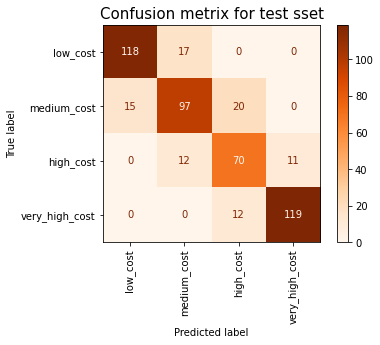

In [155]:
# Plotting confusion metrix for test set.
plot_confusion_matrix(dtc,x_test,y_test, cmap='Oranges', display_labels=class_list, xticks_rotation='vertical')
plt.title('Confusion metrix for test sset', fontsize=15)
plt.show()

In [156]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       359
         1.0       1.00      1.00      1.00       358
         2.0       1.00      1.00      1.00       398
         3.0       1.00      1.00      1.00       355

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [157]:
# Printing classification of test set.
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       135
         1.0       0.77      0.73      0.75       132
         2.0       0.69      0.75      0.72        93
         3.0       0.92      0.91      0.91       131

    accuracy                           0.82       491
   macro avg       0.81      0.82      0.82       491
weighted avg       0.83      0.82      0.82       491



* Train set accuracy is 100% and Test accuracy is 82%
* Model is overfitted on train set and does not generalised well.
* We will tune hyperparameter to reduce overfitting and try to improve model performance.

# **Lets tune some hyperparameter of Decision tree classifier.**

In [158]:
# Creating an object for classifier.
dtc_ = DecisionTreeClassifier(random_state=0)

In [159]:
# Parameter grid value for hyperparameter tuning.
grid_values = {'criterion':['gini','entropy'],
               'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
               'splitter':['best','random'],
               'min_samples_split':[3,5,10],
               'max_features':['auto','sqrt','log2',None]}

In [160]:
# Applying GridsearchCV and fitting model in it.
dtc_tune = GridSearchCV(dtc_, param_grid=grid_values, cv=5, scoring='accuracy', verbose=3)
dtc_tune.fit(x_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.272 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.279 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.296 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.259 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.272 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.310 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.231 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [161]:
# Getting best params for models.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [162]:
# Getting best estimator.
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=0)

In [163]:
# Using best parameter and training the data.
dtc_optimal = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3, random_state=0)
dtc_optimal.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=0)

In [167]:
# predicting y values of train and test set.
y_train_predi = dtc_optimal.predict(x_train)
y_test_predi = dtc_optimal.predict(x_test)

In [168]:
# Checking the acurracy of train set.
accuracy_score(y_train,y_train_predi)

0.9945578231292517

In [169]:
# Checking the accuracy of test set.
accuracy_score(y_test,y_test_predi)

0.869653767820774

In [170]:
# Getting confusion metrix for test set.
cf_metrix = confusion_matrix(y_test,y_test_predi)
cf_metrix

array([[127,   8,   0,   0],
       [  8, 112,  12,   0],
       [  0,  13,  71,   9],
       [  0,   0,  14, 117]])

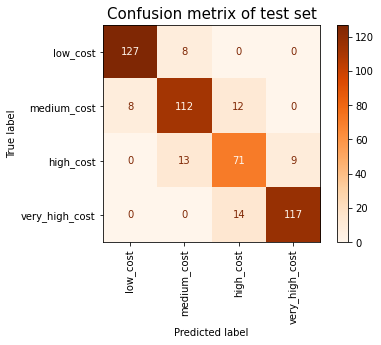

In [171]:
# Plotting confusion metrix for test set.
plot_confusion_matrix(dtc_optimal,x_test,y_test, cmap='Oranges', display_labels=class_list, xticks_rotation='vertical')
plt.title('Confusion metrix of test set', fontsize=15)
plt.show()

In [172]:
# Printing classification report for train set.
print(classification_report(y_train,y_train_predi))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       359
         1.0       0.99      0.99      0.99       358
         2.0       0.99      0.99      0.99       398
         3.0       1.00      0.99      1.00       355

    accuracy                           0.99      1470
   macro avg       0.99      0.99      0.99      1470
weighted avg       0.99      0.99      0.99      1470



In [173]:
# Printing classification report for test set.
print(classification_report(y_test,y_test_predi))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       135
         1.0       0.84      0.85      0.85       132
         2.0       0.73      0.76      0.75        93
         3.0       0.93      0.89      0.91       131

    accuracy                           0.87       491
   macro avg       0.86      0.86      0.86       491
weighted avg       0.87      0.87      0.87       491



In [178]:
# creating the function for plotting feature importance.
def plot_feature_importance(algo):
  importance = algo.feature_importances_
  feature_importance = pd.DataFrame({'Feature':x.columns, 'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(15,8))
  sns.barplot(x=feature_importance['score'],y=feature_importance['Feature'])
  plt.title('Feature importance')

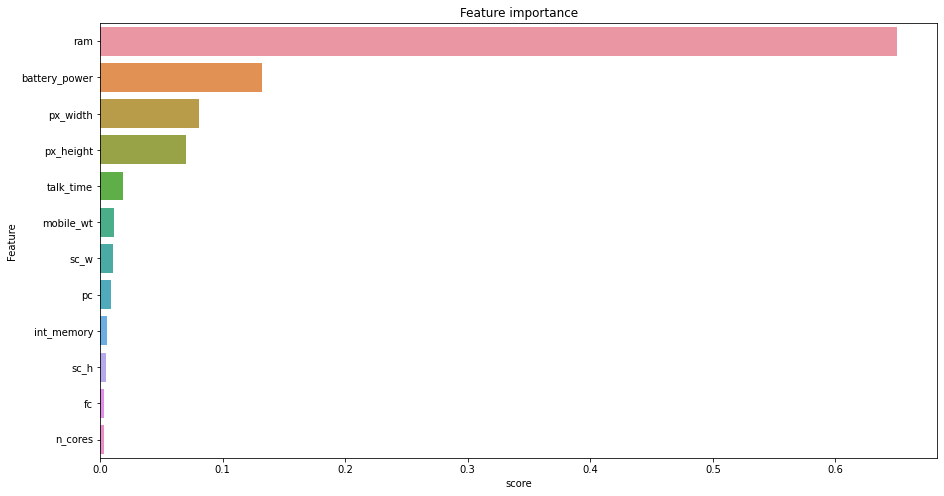

In [179]:
# Plotting feature importance.
plot_feature_importance(dtc_optimal)

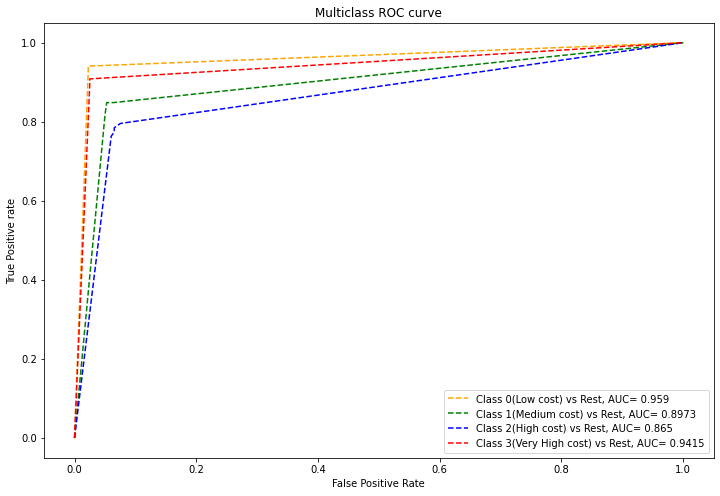

In [180]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(x_test)
plot_auc_roc(y_test,pred_prob)

# **Decision tree classifier observation:**
* Train accuracy has been reduced to 99% from 100% and test accuracy is increased by 1%. The somewhat we reduced the overfitting by reducing the training accuracy, However this will not be good model for us.
* RAM, battary_power, px_height, and width came out to be the most important feature of our dataset.
* This model classified the class 0 and class 3 very well as we can see the auc is 0.95 for both classes, where as the class 2 and class 1 is at 0.88. 